In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


Loading Dataset and fimding End of Month Total Revenue

In [2]:
df = pd.read_csv("C:/Users/SCIENCE/Documents/time3.csv", parse_dates=True, index_col=[0])
df

,Units Sold,Total Revenue
Order Date,,
2015-08-31,3604,2408445.08
2010-11-20,8435,2153286.80
2017-06-22,4848,2045322.72
2012-02-28,7225,3048155.25
2010-08-12,1975,406257.50
...,...,...
2010-11-16,39,363.87
2013-12-14,8856,1351248.48
2010-02-18,261,2435.13


In [3]:
ts = df["Total Revenue"].resample("MS").sum()
ts.tail()

Order Date
2017-02-01    9637114.62
2017-03-01    8129230.06
2017-04-01    4457534.50
2017-05-01    9844060.30
2017-06-01    2850432.52
Freq: MS, Name: Total Revenue, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

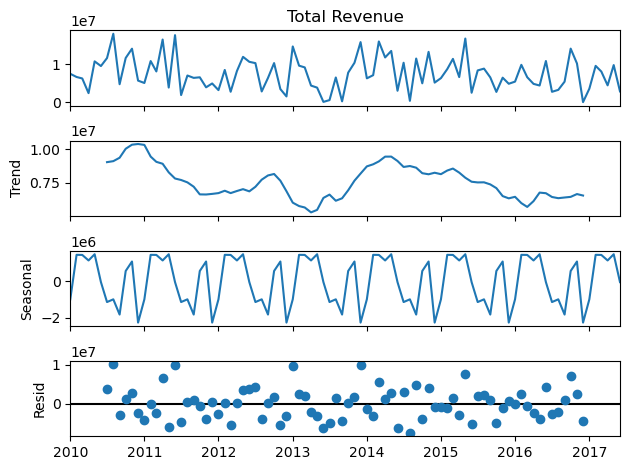

In [4]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(ts, model="additive")
fig = decomposition.plot()
plt.show

In [5]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts)
print("pvalue of the adfuller test is:", adf[1])

pvalue of the adfuller test is: 8.642348396166481e-17


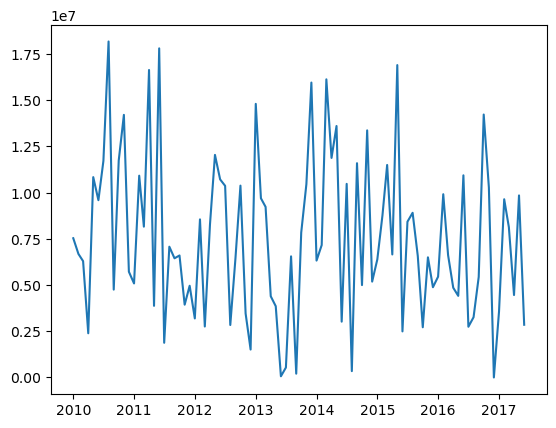

In [6]:
plt.plot(ts)


Finding the p,d, q (autoregressive, differencing, moving averages)

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

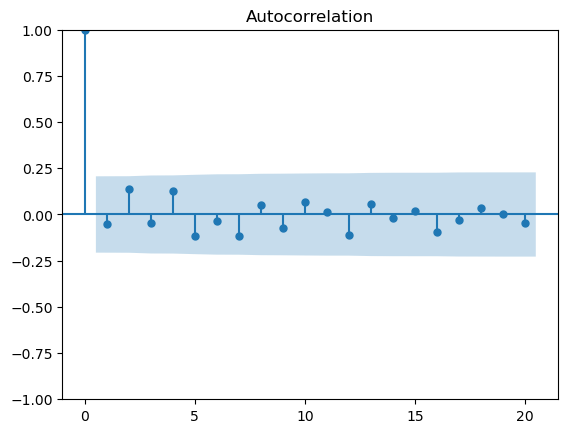

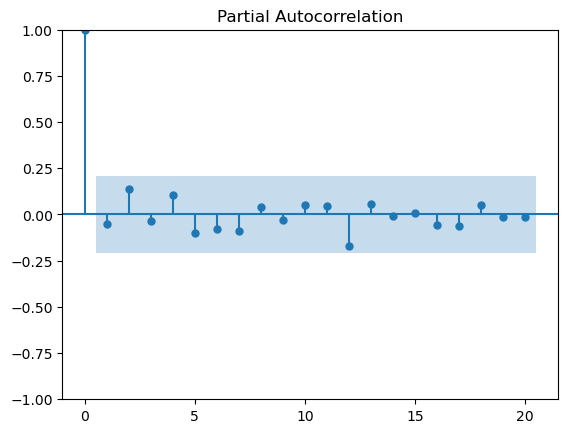

In [8]:
acf = plot_acf(ts)
pacf = plot_pacf(ts)              

In [11]:
import pmdarima as pm
auto_arima = pm.auto_arima(ts, stepwise=False, seasonal=False)
auto_arima 

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
Training and Testing the model and Evaluating its Performance

In [12]:
len(ts)

90

In [13]:
train=ts[:80]
test=ts[80:]
test

Order Date
2016-09-01     5436248.61
2016-10-01    14218201.72
2016-11-01    10275672.60
2016-12-01           0.00
2017-01-01     3574075.18
2017-02-01     9637114.62
2017-03-01     8129230.06
2017-04-01     4457534.50
2017-05-01     9844060.30
2017-06-01     2850432.52
Freq: MS, Name: Total Revenue, dtype: float64

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model = ARIMA(train,order=(2,0,2)).fit()
model

In [18]:
pred = model.predict(start=len(train), end=(len(ts)-1))
pred

2016-09-01    6.458152e+06
2016-10-01    7.321305e+06
2016-11-01    7.191111e+06
2016-12-01    7.602843e+06
2017-01-01    7.439169e+06
2017-02-01    7.661880e+06
2017-03-01    7.532509e+06
2017-04-01    7.663555e+06
2017-05-01    7.572952e+06
2017-06-01    7.653812e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [19]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(pred,test))

17363474741666.084


<Axes: xlabel='Order Date'>

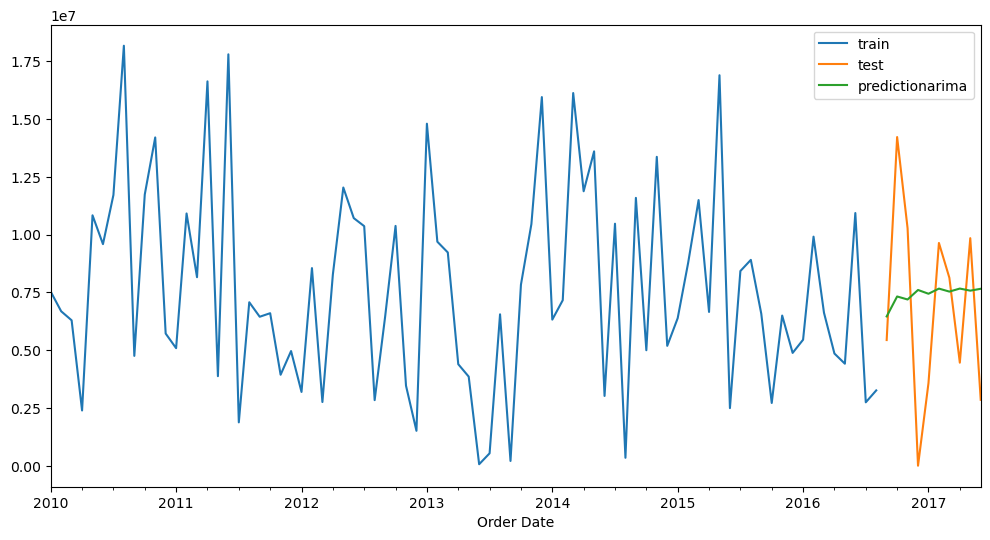

In [20]:
train.plot(legend=True, label="train", figsize=(12,6))
test.plot(legend=True, label="test")
pred.plot(legend=True, label="predictionarima")

In [ ]:
Using the model(ARIMA) to Predict the Total Revenue of the next 6 months

In [21]:
final_model = ARIMA(ts,order=(1,0,0)).fit()
pred1=final_model.predict(len(ts),len(ts)+6)
pred1

2017-07-01    7.766249e+06
2017-08-01    7.525065e+06
2017-09-01    7.536898e+06
2017-10-01    7.536318e+06
2017-11-01    7.536346e+06
2017-12-01    7.536345e+06
2018-01-01    7.536345e+06
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Order Date'>

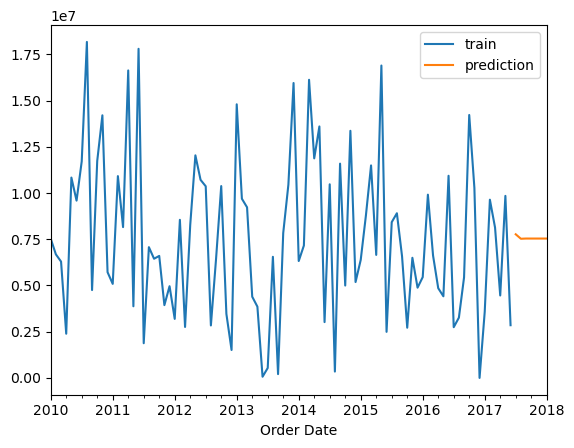

In [22]:
ts.plot(legend=True, label="train")
pred1.plot(legend=True, label="prediction")